In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data=pd.read_csv('/home/vinod/Downloads/SMSSpamCollection.csv')

In [3]:
data.head(5)

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.describe()

,Class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
data.isna().sum()

Class    0
sms      0
dtype: int64

<AxesSubplot:>

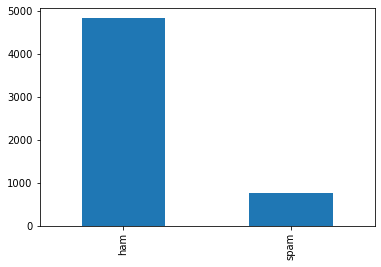

In [8]:
data.Class.value_counts().plot(kind='bar')

In [9]:
percentage=747/5572*100

In [10]:
print("Spam % is {:.4f}".format(percentage))

Spam % is 13.4063


In [11]:
data['Label']=data['Class'].map({'ham':0,'spam':1})

In [12]:
data.head(3)

,Class,sms,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [13]:
X=data['sms']

In [14]:
y=data['Label']

In [15]:
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=140)

In [18]:
X_train.head(5)

5262                              Did you see that film:)
3133    I've been barred from all B and Q stores for l...
2234                         Good Morning plz call me sir
863     Sorry, I guess whenever I can get a hold of my...
3279                          What happened in interview?
Name: sms, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv=CountVectorizer(stop_words='english',lowercase=True)

In [21]:
cv.fit(X_train)

CountVectorizer(stop_words='english')

In [22]:
print("Vocabulay",cv.vocabulary_)

Vocabulay {'did': 1760, 'film': 2156, 've': 5403, 'barred': 947, 'stores': 4858, 'life': 3061, 'twat': 5281, 'orange': 3708, 'dungerees': 1901, 'came': 1236, 'asked': 845, 'wanted': 5497, 'decking': 1692, 'got': 2412, 'punch': 4117, 'good': 2399, 'morning': 3434, 'plz': 3939, 'sir': 4627, 'sorry': 4732, 'guess': 2461, 'hold': 2598, 'connections': 1503, 'maybe': 3291, 'hour': 2634, 'll': 3106, 'text': 5071, 'happened': 2501, 'interview': 2779, 'eatin': 1931, 'lor': 3140, 'goin': 2388, 'work': 5634, 'soon': 4727, 'mountain': 3442, 'deer': 1699, 'huh': 2660, 'watch': 5511, 'b4': 907, 'liao': 3055, 'nice': 3562, 'saying': 4447, 'haven': 2524, 'explicitly': 2065, 'told': 5180, 'nora': 3594, 'know': 2960, 'probably': 4065, 'just': 2896, 'gonna': 2397, 'bother': 1100, 'don': 1839, 'think': 5109, 'need': 3531, 'going': 2389, 'late': 3003, 'school': 4452, 'night': 3567, 'especially': 2005, 'class': 1397, 'missed': 3370, 'wednesday': 5540, 'failed': 2084, 'test': 5067, 'friday': 2267, 'castor': 

In [23]:
feature_name=cv.get_feature_names()

In [24]:
feature_name

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585334',
 '02',
 '0207',
 '02073162414',
 '021',
 '03',
 '04',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07099833605',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07808726822',
 '07821230901',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '08448350055',
 '0845',
 '08450542832',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700621170150p',
 '08701417012',
 '08701417012150p',
 '0870141701216',
 '08701752560',
 '0870241182716',
 '08702840625',
 '08704050406',
 '08704439680ts',
 '08706091795',
 '08707509020',
 '08708034412',
 '08709222922',
 '0871',
 '087104711148',
 '087121013

In [25]:
len(feature_name)

5750

In [26]:
X_test_tranformed=cv.fit_transform(X_test)
X_train_transformed=cv.fit_transform(X_train)

In [27]:
X_train=X_train_transformed.toarray()

In [28]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
X_train.shape

(2786, 5750)

In [30]:
print(X_train_transformed)

  (0, 1760)	1
  (0, 2156)	1
  (1, 5403)	1
  (1, 947)	1
  (1, 4858)	1
  (1, 3061)	1
  (1, 5281)	1
  (1, 3708)	1
  (1, 1901)	1
  (1, 1236)	1
  (1, 845)	1
  (1, 5497)	1
  (1, 1692)	1
  (1, 2412)	1
  (1, 4117)	1
  (2, 2399)	1
  (2, 3434)	1
  (2, 3939)	1
  (2, 4627)	1
  (3, 4732)	1
  (3, 2461)	1
  (3, 2598)	1
  (3, 1503)	1
  (3, 3291)	1
  (3, 2634)	1
  :	:
  (2783, 3196)	1
  (2784, 2399)	1
  (2784, 3003)	1
  (2784, 1397)	1
  (2784, 5146)	1
  (2784, 2619)	1
  (2784, 3912)	1
  (2784, 1668)	1
  (2784, 3664)	1
  (2784, 5188)	1
  (2784, 5612)	1
  (2784, 4823)	1
  (2784, 4657)	1
  (2784, 3940)	1
  (2784, 1435)	1
  (2784, 2113)	1
  (2784, 1654)	1
  (2784, 1792)	1
  (2785, 3140)	1
  (2785, 5146)	1
  (2785, 3005)	1
  (2785, 5510)	1
  (2785, 5047)	1
  (2785, 3664)	1
  (2785, 1457)	1


In [31]:
len(y_train)

2786

In [32]:
print(X_test_tranformed)

  (0, 2223)	1
  (0, 2564)	1
  (0, 1149)	1
  (0, 267)	1
  (0, 3188)	1
  (0, 4432)	1
  (0, 3353)	1
  (0, 2602)	1
  (0, 2084)	1
  (0, 4167)	1
  (0, 4281)	1
  (0, 3905)	1
  (0, 4129)	1
  (0, 2548)	1
  (0, 3489)	1
  (0, 4508)	1
  (0, 4871)	2
  (0, 5328)	1
  (1, 2906)	1
  (1, 2123)	1
  (1, 5554)	1
  (1, 5314)	1
  (2, 1468)	1
  (2, 2420)	1
  (2, 5537)	1
  :	:
  (2782, 4761)	1
  (2782, 2570)	1
  (2782, 3440)	1
  (2782, 1849)	1
  (2782, 1505)	1
  (2782, 2)	1
  (2783, 3878)	1
  (2783, 3362)	1
  (2783, 5093)	1
  (2783, 5449)	1
  (2783, 1318)	1
  (2783, 632)	1
  (2783, 1641)	1
  (2783, 5808)	1
  (2783, 4835)	1
  (2784, 4838)	1
  (2784, 593)	1
  (2784, 5520)	1
  (2784, 594)	1
  (2784, 5585)	1
  (2784, 4123)	1
  (2785, 3170)	1
  (2785, 1854)	1
  (2785, 5567)	1
  (2785, 2852)	1


In [33]:
cv.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585334',
 '02',
 '0207',
 '02073162414',
 '021',
 '03',
 '04',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07099833605',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07808726822',
 '07821230901',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '08448350055',
 '0845',
 '08450542832',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700621170150p',
 '08701417012',
 '08701417012150p',
 '0870141701216',
 '08701752560',
 '0870241182716',
 '08702840625',
 '08704050406',
 '08704439680ts',
 '08706091795',
 '08707509020',
 '08708034412',
 '08709222922',
 '0871',
 '087104711148',
 '087121013

In [34]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
X_train_transformed_matrix=pd.DataFrame(X_train,columns=cv.get_feature_names())

In [36]:
X_train_transformed_matrix

,00,000,000pes,008704050406,0089,0121,01223585334,02,0207,02073162414,...,zed,zeros,zhong,zindgi,zoe,zoom,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.naive_bayes import BernoulliNB

In [38]:
ber=BernoulliNB()

In [39]:
ber.fit(X_train,y_train)

BernoulliNB()

In [40]:
y_pred_class=y_test

In [41]:
X_test1=X_test_tranformed.toarray()

In [42]:
X_test1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
print(X_test1.shape)

(2786, 5810)


In [44]:
X_test=X_train_transformed_matrix

In [45]:
y_pred=ber.predict(X_test)

In [46]:
y_pred.shape

(2786,)

In [47]:
Y_train=np.asarray(y_train)

In [48]:
ber.score(X_train,Y_train)

0.9842067480258435

In [49]:
ber.score(X_test,y_test)

0.780689160086145

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
score=accuracy_score(y_test,y_pred)

In [52]:
print("Theaccuracy score {:.4f}".format(score))

Theaccuracy score 0.7807


In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
cm=confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[2128,  278],
       [ 333,   47]])

In [56]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

In [57]:
TP/float(TP+FN)

0.12368421052631579

In [58]:
TN/float(TN+FP)

0.8844555278470491

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2406
           1       0.14      0.12      0.13       380

    accuracy                           0.78      2786
   macro avg       0.50      0.50      0.50      2786
weighted avg       0.77      0.78      0.77      2786



In [61]:
from sklearn.metrics import roc_curve,auc

In [62]:
false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test,y_pred)

In [63]:
roc=auc(false_positive_rate, true_positive_rate)

In [64]:
roc

0.5040698691866825

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [66]:
mu=MultinomialNB()

In [67]:
mu.fit(X_train,y_train)

MultinomialNB()

In [68]:
y_pred1=mu.predict(X_test)

In [69]:
mu.score(X_test,y_test)

0.7706389088298636

In [70]:
mu.score(X_train,y_train)

0.9949748743718593

In [71]:
cm=confusion_matrix(y_test,y_pred1)

In [72]:
cm

array([[2090,  316],
       [ 323,   57]])

In [73]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2406
           1       0.15      0.15      0.15       380

    accuracy                           0.77      2786
   macro avg       0.51      0.51      0.51      2786
weighted avg       0.77      0.77      0.77      2786



In [74]:
gu=GaussianNB()

In [75]:
gu.fit(X_train,y_train)

GaussianNB()

In [76]:
y_pred2=gu.predict(X_test)

In [77]:
gu.score(X_test,y_test)

0.7343862167982771

In [78]:
gu.score(X_train,y_train)

0.9486719310839914

In [79]:
cm=confusion_matrix(y_test,y_pred2)

In [80]:
cm

array([[1971,  435],
       [ 305,   75]])

In [81]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2406
           1       0.15      0.20      0.17       380

    accuracy                           0.73      2786
   macro avg       0.51      0.51      0.51      2786
weighted avg       0.77      0.73      0.75      2786

